# Clase 9
Este notebook busca incluir los conceptos teóricos que se deben mostrar en clase, junto con los ejercicios a plantear.

## Repaso teórico


### Relación entre sistemas LTI y exponenciales complejas. Funciones de sistema.
$y(t) = h(t) \ast x(t)$ 
Como se vio en la Clase 14 de teórico, las exponenciales complejas son importantes en el estudio de los sistemas LTI, ya que la respuesta de un sistema LTI a una exponencial compleja, es la misma exponencial compleja con solo un cambio de amplitud:

tiempo continuo: $ e^{st} \rightarrow H(s)e^{st} $

tiempo discreto: $ z^{n} \rightarrow H(z)z^{n} $

donde el factor complejo de amplitud $H(s)$ o $H(z)$ será en general una función de variable compleja $s$ o $z$.

Se puede demostrar que las exponenciales complejas son funciones propias de los sistemas LTI, cumpliéndose que: 

si $x(t) = e^{st}$, entonces, $y(t) = H(s)e^{st}$, y $H(s) = \int_{-\infty}^{+\infty} h(\tau)e^{-s\tau} \, d\tau$, siendo $h(t)$ la respuesta al impulso del sistema. (1)

Análogamente para el caso de tiempo discreto:

$y[n] = H(z)z^{n}$

$H(z) = \sum_{k = -\infty}^{+\infty}h[k]z^{-k}$

<br>

La potencia de esto, es que si mi entrada la separo en exponenciales de distinta frecuencia, luego mi salida va a ser una combinación lineal de las mismas, donde el coeficiente que multiplica a cada exponencial de entrada, está determinada por la función $H$.



### Respuesta en frecuencia de un sistema LTI. Calcular salida a sistema para entradas exponenciales complejas puras 
Cuando $s$ o $z$ son números complejos, estas funciones se conocen como funciones del sistema. Ahora nos vamos a enfocar en el caso periódico, en el que: $Re\{s\} = 0$, por lo tanto $s = j\omega$, y $e^{st} = e^{jwt}$. Esto quiere decir que el exponente es armónico puro, por lo que la entrada es una exponencial compleja de frecuencia $\omega$. Sustituyendo en la función $H(s)$, obtenemos $H(j\omega)$ conocida como la respuesta en frecuencia del sistema:

\begin{equation}
H(j\omega) = \int_{-\infty}^{+\infty} h(\tau)e^{-j\omega \tau} \, d\tau 
\tag{1}
\end{equation}






Ahora, consideremos una entrada de $x(t)$ de la siguiente forma:

$x(t) = \sum_{k = -\infty}^{+\infty}a_{k}e^{jk\omega_{0}t}$

Notar que es una sumatoria de exponenciales complejas puras, donde cada una de ellas está multiplicada por un coeficiente $a_{k}$.


Ahora podemos usar (1) y el principio de superposición para calcular $y(t)$:

\begin{equation}
y(t) = \sum_{k = -\infty}^{+\infty}a_{k}H(jk\omega_{0})e^{jk\omega_{0}t}
\tag
\end{equation}

La función $H(j\omega)$ queda evaluada en $\omega=k\omega_{0}$ porque es lo que $x(t)$ tiene en su exponente, recordar que: $y(t) = H(s)e^{st}$.

Notar que la expresión obtenida corresponde a una Serie de Fourier, ya que es un escalar multiplicado por exponenciales complejas puras. De acuerdo a la expresión de SF vistas, este escalar corresponde a los coeficientes de Fourier de $y(t)$, llamémoslos $b_{k}$. Por lo tanto $b_{k} = a_{k}H(jk\omega_{0})$.  

Si evaluamos $\omega = k\omega_{0}$ en la expresión (2), vemos que el resultado solo depende de $k$. Por lo tanto los coeficientes de la respuesta al impulso quedan definidos por $h_{k} = H(jk\omega_{0})$. 

En resumen, se podría calcular $y(t)$ de la siguiente manera:
1. Calcular $h_{k} =  H(jk\omega_{0})$.
2. Calcular los coeficientes de Fourier de la salida $y(t)$ de la siguiente manera: $b_{k} = a_{k}h_{k}$, donde $a_{k}$ son los coeficientes de Fourier de la entrada.
3. Usar la ecuación de síntesis para reconstruir $y(t)$ a partir de sus coeficientes de Fourier $b_{k}$.

<br>


**Respuesta en frecuencia del sistema en tiempo discreto**

$H(e^{j\omega}) = \sum_{n = -\infty}^{+\infty}h[n]e^{-j\omega n}$


Para más información, consultar pág 183, 184, 226, 227 y 228 del Oppenheim.

In [21]:
# Importar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 3.16
Este sistema es el de la entrega, no? Es importante
<br>
Tenemos un sistema que tiene respuesta al impulso $h(t) = e^{-t}u(t)$. Para calcular la salida $y(t)$, en primer lugar calculamos $H(j\omega)$.

Text(0.5, 1.0, 'Fase del sistema')

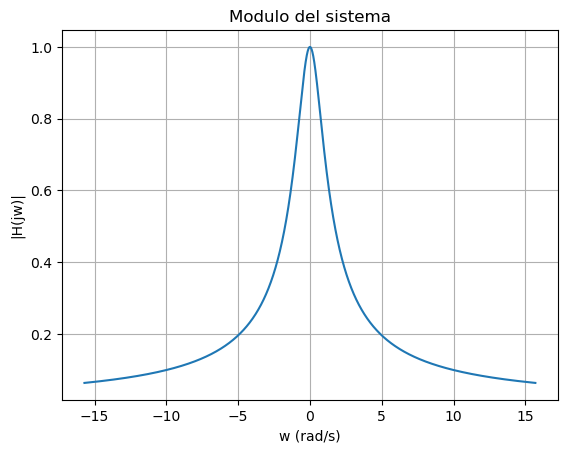

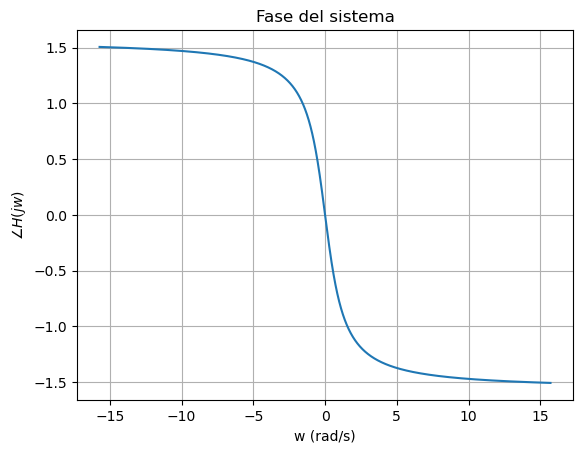

In [22]:
# Me defino un eje w para graficar H(jw)
w = np.arange(-5*np.pi, 5*np.pi, 0.01)

# Calculo de H(jw)
H_jw = 1/(1 + 1j*w)  # pag 229 del Opphm

plt.figure()
plt.plot(w, np.abs(H_jw))
plt.xlabel('w (rad/s)')
plt.ylabel('|H(jw)|')
plt.grid()
plt.title('Modulo del sistema')

plt.figure()
plt.plot(w, np.angle(H_jw))
plt.xlabel('w (rad/s)')
plt.ylabel('$ \\angle H(jw)$')
plt.grid()
plt.title('Fase del sistema')



Recordemos que la entrada tiene la siguiente forma:

\begin{equation}
x(t) = \sum_{k = -3}^{+3}a_{k}e^{jk\omega_{0}t}
\end{equation}

A su vez $\omega_{0} = 2\pi$, por lo que $T=1$. Por otro lado se tiene que:
<br>
$a_{0} = 1,$
<br>
$a_{1} = a_{-1} = 1/4,$
<br>
$a_{2} = a_{-2} = 1/2,$
<br>
$a_{3} = a_{-3} = 1/3.$



Ahora procedemos a calcular $y(t)$. Vamos a calcular sus coeficientes $b_{k}$. Como vimos mas arriba, $b_{k} = a_{k}h_{k}$, y por otro lado $h_{k} =  H(jk\omega_{0})$. Entonces, sustituyendo:
<br>
$b_{k} = a_{k} H(jk2\pi)$, ya que $\omega_{0} = 2\pi$.
<br>
<br>
Pero, que es $H(jk2\pi)$ o $h_{k}$? **Programemos**

Text(0.5, 1.0, 'Fase del sistema')

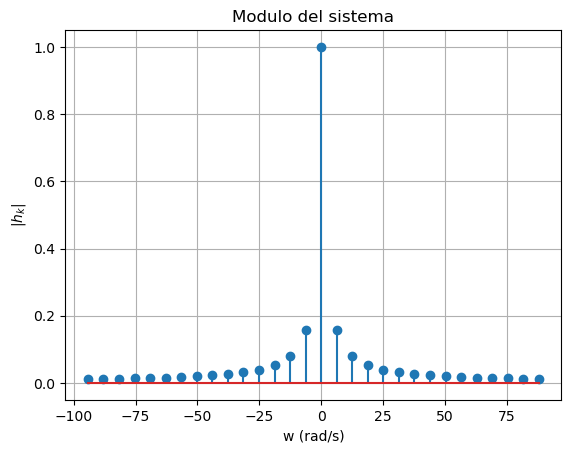

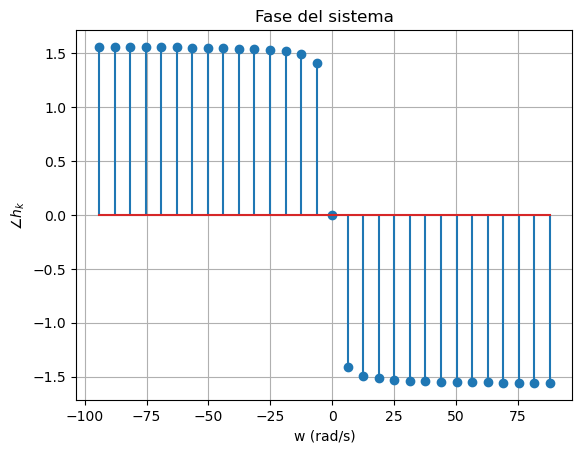

In [23]:
# Lo que voy a hacer es quedarme con algunos puntos de H(jw), es decir, en este caso, disminuir el paso
w0 = 2*np.pi
k = np.arange(-15, 15, 1) # Podria crear el vector w de una, eligiendo el paso como w0 en lugar de 1, pero asi queda mas grafico

w = k*w0

h_k = 1/(1 + 1j*w)  # Misma expresion que antes

plt.figure()
plt.stem(w, np.abs(h_k))
plt.xlabel('w (rad/s)')
plt.ylabel('|$h_{k}$|')
plt.grid()
plt.title('Modulo del sistema')

plt.figure()
plt.stem(w, np.angle(h_k))
plt.xlabel('w (rad/s)')
plt.ylabel('$\\angle h_{k}$')
plt.grid()
plt.title('Fase del sistema')

**Pregunta:**¿qué pasaría si $T$ fuera muy grande? ¿Cómo sería $h_{k}$ con respecto a $H(j\omega)$?

Retomando el cálculo de $y(t)$, recordemos que $b_{k} = a_{k}h_{k}$, el cual podemos calcular dado que tenemos los valores de $a_{k}$ y $h_{k}$. A su vez $a_{k}$ tiene muchos coeficientes igual a 0, por lo tanto, en esos mismos $k$, $b_{k}$ será igual a 0 también. En consecuencia, $y(t)$ queda planteado de la siguiente manera:

\begin{equation}
y(t) = \sum_{k = -3}^{+3}b_{k}e^{jk\omega_{0}t}
\end{equation}

Habiendo calculado previamente $b_{k}$, podemos calcular $y(t)$.

Text(0.5, 1.0, 'Entrada (verde) vs salida (azul)')

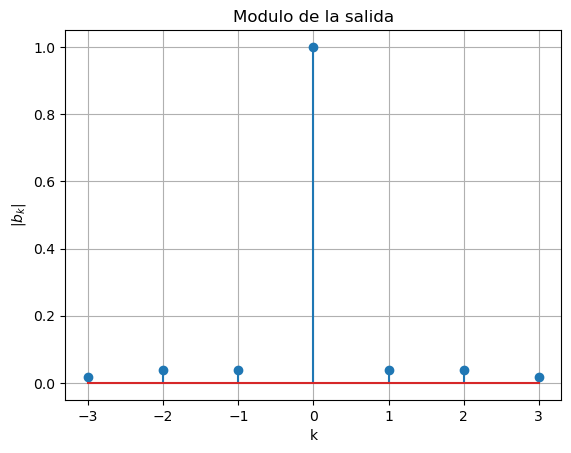

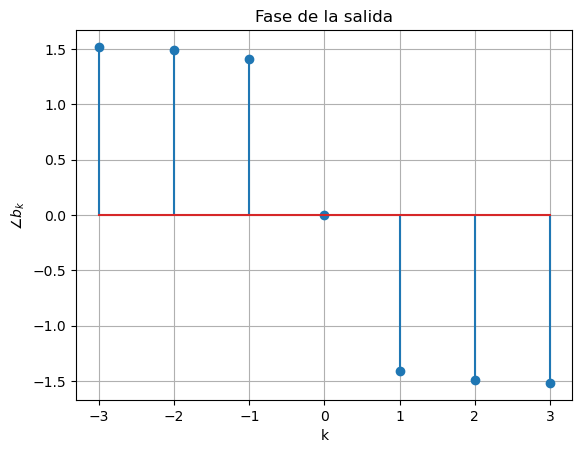

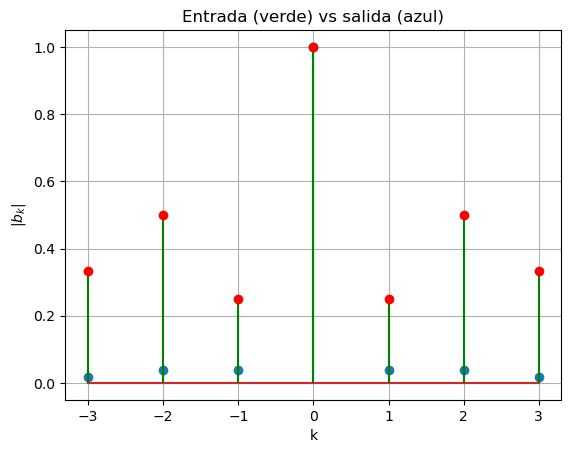

In [24]:
k = np.arange(-3, 4, 1)  # Para que incluya el 3. Me tomo este k porque en el resto, a_k=0

a_k = [1/3, 1/2, 1/4, 1, 1/4, 1/2, 1/3] # El primer elemento es el a_-3, el segundo de a_-2 y asi

w = k*w0  # El w0 ya lo tenia definido. Ahora uso el nuevo k. No podia usar el anterior porque tenia otro largo, tengo que usar el mismo que para el ak
h_k = 1/(1 + 1j*w)  # Misma expresion que antes

b_k = a_k * h_k

# Ahora graficamos en k y no en w
plt.figure()
plt.stem(k, np.abs(b_k))
plt.xlabel('k')
plt.ylabel('|$b_{k}$|')
plt.grid()
plt.title('Modulo de la salida')

plt.figure()
plt.stem(k, np.angle(b_k))
plt.xlabel('k')
plt.ylabel('$ \\angle b_{k}$')
plt.grid()
plt.title('Fase de la salida')

plt.figure()
plt.stem(k, np.abs(b_k))
plt.stem(k, np.abs(a_k), linefmt='-g', markerfmt='ro', basefmt=' ')
plt.xlabel('k')
plt.ylabel('|$b_{k}$|')
plt.grid()
plt.title('Entrada (verde) vs salida (azul)')

**Pregunta**: ¿tiene sentido la salida considerando la respuesta en frecuencia del sistema?

Sí, porque en la respuesta en frecuencia se puede ver que es un pasabajos, y efectivamente las frecuencias más bajas sufren menos atenuaciones (en $k=0$ la señal amplitud se mantiene incambiada).


Ahora veamos qué pasa en el tiempo:

C:\Users\Ing. Biologica\AppData\Local\Temp\ipykernel_9352\2830246099.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  ingredientes[i, :] = b_k[i] * np.exp(1j*k[i]*w0*t)


Text(0.5, 1.0, '$y(t)$ y sus ingredientes')

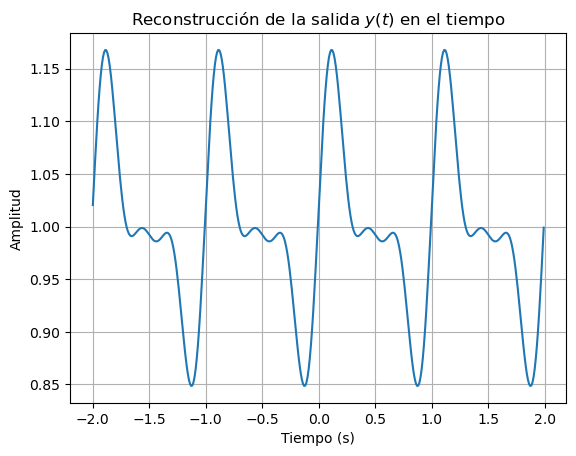

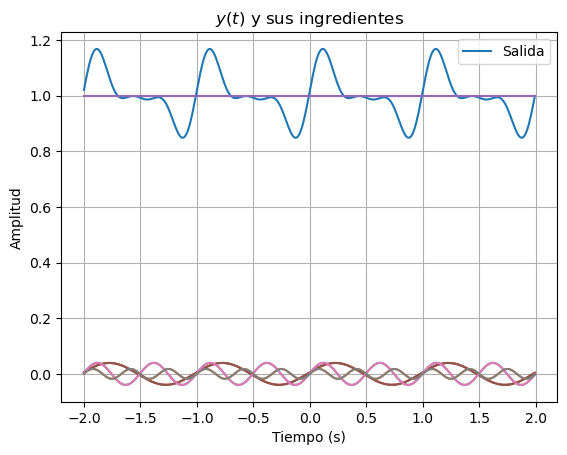

In [25]:
# Definimos un vector de tiempo donde va a vivir la senal reconstruida
t_fin = 2
t = np.arange(-t_fin, t_fin, 0.01)

# Procedemos a hacer la sumatoria
y_t = np.zeros_like(t)  # Se que y_t tiene la misma forma (paso y largo) que t. Ahora voy sumando el aporte de cada k a la senal temporal
ingredientes = np.zeros((len(k), len(t)))

for i in range(len(k)):
    y_t = y_t + b_k[i]*np.exp(1j*k[i]*w0*t)
    ingredientes[i, :] = b_k[i] * np.exp(1j*k[i]*w0*t)

    
plt.figure()
plt.plot(t, y_t)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.title('Reconstrucción de la salida $y(t)$ en el tiempo')

# Si se iguala a 0 la componente en k=0, se ve mucho mejor los ingredientes
plt.figure()
plt.plot(t, y_t)
for i in range(ingredientes.shape[0]):
    plt.plot(t, ingredientes[i, :])
plt.legend(['Salida'])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.title('$y(t)$ y sus ingredientes')




### Sistemas LTI usados como filtros selectivos en frecuencia

## Ejemplo 3.17

En este ejemplo trabajaremos en tiempo discreto. La respuesta al impulso de este sistema tiene la siguiente forma: $h[n] = \alpha ^{n}u[n]$, con $-1<\alpha<1$.
<br>
Haciendo cuentas, podemos llegar a la expresion de $H(e^{jw})$ (las cuentas estan en el cuaderno):

\begin{equation}
H(e^{jw}) = \dfrac{1}{1-\alpha e^{-jw}}
\end{equation}

<br>
Si calculamos a mano modulo y fase de $H(e^{jw})$, obtenemos las siguientes expresiones (las cuentas estan en el cuaderno):

\begin{equation}
|H(e^{jw})| = \dfrac{1}{\sqrt{1 + \alpha ^{2} - 2\alpha cos(w)}}
\end{equation}

<br>
\begin{equation}
\angle H(e^{jw}) = \ -arctg 
\left( \dfrac{\alpha sen(w)}{1 - \alpha cos(w)} \right)
\
\end{equation}

A continuacion, vamos a graficar el modulo y fase calculado a mano, y luego con una aplicando funciones de Python, para $\alpha = 0.6$.

In [26]:
w = np.arange(-np.pi, np.pi, 0.01) # solo tiene sentido mirar de -pi a pi, luego se repite periodicamente

a = 0.6           # valor de alfa elegido
H = 1/(1 - a*np.exp(-1j*w))      # expresion de H(e^jw)

# Modulo y fase calculado a mano (funciones de w)
H_mod_mano = 1/np.sqrt(1 + a**2 - 2*a*np.cos(w))
H_fase_mano = -np.arctan((a*np.sin(w))/(1 - a*np.cos(w)))

# Modulo y fase calculado con funciones
H_mod_func = np.abs(H)
H_fase_func = np.angle(H)


Visualizacion y comparacion de los modulos y fases

Text(0.5, 1.0, 'Fase de $H(e^{jw})$')

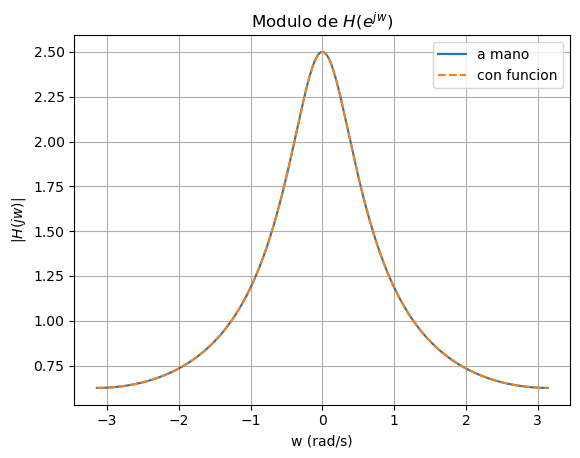

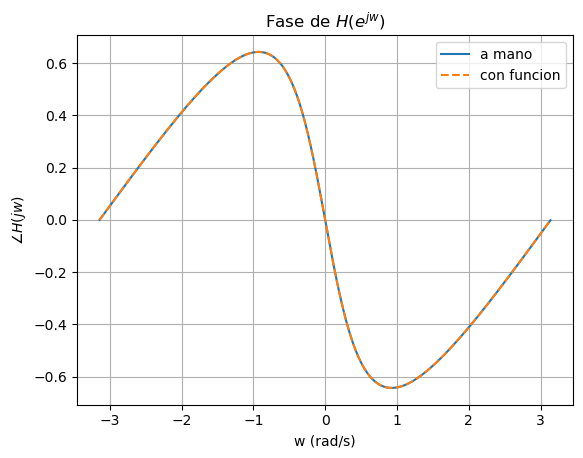

In [32]:
plt.figure()
plt.plot(w, H_mod_mano)
plt.plot(w, H_mod_func, linestyle = 'dashed')
plt.xlabel('w (rad/s)')
plt.ylabel('$|H(jw)|$')
plt.grid()
plt.legend(['a mano', 'con funcion'])
plt.title('Modulo de $H(e^{jw})$')

plt.figure()
plt.plot(w, H_fase_mano)
plt.plot(w, H_fase_func, linestyle = 'dashed')
plt.xlabel('w (rad/s)')
plt.ylabel('$ \\angle H(jw)$')
plt.grid()
plt.legend(['a mano', 'con funcion'])
plt.title('Fase de $H(e^{jw})$')


Se puede ver que se obtiene el mismo resultado de ambas maneras.

(Explicar algo introductorio de lo que se habla en la Pag 244 OPP, que vincule los sistemas en tiempo discreto expresandos en ecuaciones en diferencias, y los sistemas en tiempo continuo expresados con ecuaciones diferenciales).
<br>
Los filtros discretos descritos por ecuaciones de diferencias lineales con coeficientes constantes son de mucha importancia en la práctica. Notar la similitud de esto último con los sistemas LTI en tiempo continuo (expresados como EDOs). 
Los sistemas LTI descritos por ecuaciones en diferencias pueden ser recursivos (IIR) o no recursivos (FIR). Los primeros son la contraparte directa de los sistemas continuos descritos por ecuaciones diferenciales como el visto en la clase anteriormente.

Ahora consideremos la siguiente ecuacion en diferencias de primer orden:
\begin{equation}
y[n] - \alpha y[n-1] = x[n]
\end{equation}

<br>
Segun lo visto en el repaso teorico, se cumple que: si $x[n] = e^{jwn}$, entonces, $y[n] = H(e^{jw})e^{jwn}$. Sustituyendo en la ecuacion en diferencias y despejando $H(e^{jw})$ se obtiene (cuentas en el cuaderno):

\begin{equation}
H(e^{jw}) = \dfrac{1}{1-\alpha e^{-jw}}
\end{equation}

Es el mismo sistema que veniamos trabajando. Por lo tanto, esta ecuacion en diferencias corresponde a dicho sistema. Se puede ver que los coeficientes del denominador de $H(e^{jw})$ son los que multiplican las salidas, y los del numerador a las entradas. Mas adelante en el curso se vera formalmente esta relacion, que permitira hacer el pasaje de frecuencia a ecuacion en diferencias facilmente. Observar que la ecuacion en diferencias permite calcular la salida muy facilmente, solo necesitamos la salida anterior y la entrada al sistema. Esto puede ser muy util pensando en una implementacion practica.



Si comparamos la respuesta en frecuencia de los sistemas de 3.16 y 3.17 (por mas que uno sea en tiempo continuo y otro en discreto), presentan una forma similar, ademas de que ambos corresponden a un filtro pasabajos. En consecuencia el sistema del 3.17, se considera la contrapartida en tiempo discreto del sistema del 3.16.